In [2]:
import numpy as np
import cv2
from skimage.transform import resize
from skimage import feature 
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import os
import re
import pandas as pd


In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [6]:
#Gray Level Co-occurence Matrix
# -------------------- Utility function ------------------------
def normalize_label(str_):
    str_ = str_.replace(" ", "")
    str_ = str_.translate(str_.maketrans("","", "()"))
    str_ = str_.split("_")
    return ''.join(str_[:2])

def normalize_desc(folder, sub_folder):
    text = folder + " - " + sub_folder 
    text = re.sub(r'\d+', '', text)
    text = text.replace(".", "")
    text = text.strip()
    return text

def print_progress(val, val_len, folder, sub_folder, filename, bar_size=10):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] folder : %s/%s/ ----> file : %s" % (progr, folder, sub_folder, filename), end="\r")
      
def label_nama(nama_label):
    if nama_label == 'yes':
        return 1
    else:
        return 0

# -------------------- Load Dataset ------------------------
 
dataset_dir ="brain_tumor_dataset/raw/"

imgs = [] #list image matrix 
labels = []
descs = []
for folder in os.listdir(dataset_dir):
    for sub_folder in os.listdir(os.path.join(dataset_dir, folder)):
        sub_folder_files = os.listdir(os.path.join(dataset_dir, folder, sub_folder))
        len_sub_folder = len(sub_folder_files) - 1
        for i, filename in enumerate(sub_folder_files):
            img = cv2.imread(os.path.join(dataset_dir, folder, sub_folder, filename))
            
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # h, w = gray.shape
            # ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
            # crop = gray[ymin:ymax, xmin:xmax]
            
            # resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)
            
            imgs.append(gray)
#             labels.append(normalize_label(os.path.splitext(filename)[0]))
            nama_label = os.path.splitext(sub_folder)[0]
            labels.append(label_nama(nama_label))
            descs.append(normalize_desc(folder, sub_folder))
            
            print_progress(i, len_sub_folder, folder, sub_folder, filename)


[##########] folder : noLBP/no/ ----> file : No22.jpggg


In [7]:
# cv2.imshow("test img", imgs[0])

# cv2.waitKey(0)
# cv2.destroyAllWindows()
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [8]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img, label in zip(imgs, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

In [9]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

#save to csv
glcm_df.to_csv("glcm_brain.csv")

glcm_df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,homogeneity_90,homogeneity_135,contrast_0,contrast_45,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,18.495025,18.729403,15.839979,18.792058,0.745861,0.748648,0.809644,0.745933,0.264365,0.252697,0.284951,0.252649,817.458659,803.762292,614.155833,812.442555,0.040097,0.036891,0.044513,0.036945,0.200243,0.192071,0.210980,0.192210,0
1,11.975222,12.829680,11.368548,12.745138,0.564677,0.515312,0.577197,0.529377,0.691198,0.685089,0.695303,0.684574,1282.767797,1451.058916,1258.786258,1408.950437,0.445698,0.435784,0.443481,0.436320,0.667606,0.660139,0.665943,0.660546,0
2,12.363125,12.879095,12.003861,12.982127,0.833830,0.828985,0.843339,0.828340,0.579187,0.571437,0.580258,0.569734,931.378344,965.957080,881.634219,969.596982,0.294493,0.288310,0.296059,0.287670,0.542672,0.536945,0.544113,0.536349,0
3,18.435149,18.174357,14.859775,18.476640,0.569702,0.580284,0.682060,0.571683,0.554215,0.555504,0.589355,0.552767,2044.643140,1987.711519,1489.328978,2028.444339,0.158025,0.160728,0.183447,0.160242,0.397523,0.400909,0.428308,0.400303,0
4,32.600933,36.192159,35.888006,37.047890,0.649259,0.582124,0.565978,0.567571,0.318934,0.290662,0.330955,0.292256,3464.333078,4150.708677,4281.988230,4295.254305,0.042232,0.034678,0.045808,0.035533,0.205504,0.186221,0.214028,0.188502,0
5,27.893096,30.017441,25.853672,29.855860,0.757682,0.724789,0.780927,0.731366,0.164037,0.164073,0.194555,0.162904,2175.913478,2442.170517,1961.718221,2383.323244,0.011894,0.012216,0.016518,0.011979,0.109058,0.110524,0.128523,0.109448,0
6,22.545211,23.524600,20.428899,23.870476,0.671615,0.639375,0.694868,0.635840,0.342679,0.332700,0.358145,0.331456,1800.977908,1975.853102,1674.043091,1995.220017,0.082118,0.076922,0.088129,0.077226,0.286563,0.277348,0.296865,0.277896,0
7,24.443358,25.124506,20.298043,24.863808,0.569172,0.562977,0.682760,0.563962,0.463028,0.454564,0.472320,0.454297,2594.284885,2644.903308,1910.810632,2638.940339,0.186580,0.179660,0.190775,0.178732,0.431949,0.423863,0.436778,0.422767,0
8,20.070667,21.937240,20.002385,21.893924,0.648237,0.597102,0.630281,0.595409,0.347872,0.344137,0.392061,0.346039,1674.721436,1937.845351,1763.657821,1945.992113,0.057737,0.056983,0.068793,0.056694,0.240285,0.238711,0.262285,0.238105,0
9,36.422279,39.105944,28.921524,38.896553,0.621540,0.577177,0.723784,0.577451,0.255850,0.220016,0.272681,0.222994,4538.169945,5040.523158,3342.544748,5037.081858,0.016558,0.013153,0.017053,0.013522,0.128677,0.114686,0.130588,0.116283,0


In [10]:
X = glcm_df.drop('label', axis=1)
y = glcm_df[['label']]

In [132]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# # print(X)

In [133]:
# X = pd.DataFrame(X)
# X

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_test

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,homogeneity_90,homogeneity_135,contrast_0,contrast_45,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
24,28.747510,30.319446,25.468463,30.240362,0.339361,0.293779,0.470899,0.299324,0.153685,0.137676,0.160539,0.138791,2367.070603,2552.728711,1957.176580,2532.705550,0.002338,0.001650,0.002330,0.001700,0.048351,0.040626,0.048274,0.041233
6,22.545211,23.524600,20.428899,23.870476,0.671615,0.639375,0.694868,0.635840,0.342679,0.332700,0.358145,0.331456,1800.977908,1975.853102,1674.043091,1995.220017,0.082118,0.076922,0.088129,0.077226,0.286563,0.277348,0.296865,0.277896
153,13.971601,14.350344,12.806302,14.924453,0.821098,0.821268,0.845838,0.802306,0.303495,0.267625,0.295266,0.268991,717.950652,719.051493,621.122325,795.349180,0.022798,0.020039,0.022187,0.020189,0.150989,0.141560,0.148954,0.142088
212,23.866233,29.929686,22.928845,29.952613,0.737705,0.611539,0.752445,0.606613,0.249146,0.195143,0.254153,0.195440,2124.372903,3080.677822,2008.127184,3119.731157,0.012541,0.010571,0.012078,0.010533,0.111989,0.102817,0.109901,0.102631
199,13.866265,14.505083,12.392371,14.317604,0.902336,0.896946,0.921158,0.901812,0.275944,0.249000,0.269057,0.252089,731.341987,771.504873,589.715817,735.078020,0.009255,0.007657,0.008443,0.007607,0.096202,0.087507,0.091886,0.087220
177,9.984701,11.709313,10.528976,11.373830,0.960866,0.950004,0.960497,0.952866,0.248189,0.219527,0.222711,0.219583,376.487789,480.793811,380.056177,453.272793,0.007921,0.006678,0.006777,0.006700,0.088999,0.081719,0.082325,0.081855
193,14.854883,16.612366,14.193783,16.210868,0.913634,0.892576,0.909862,0.897665,0.241743,0.222224,0.258436,0.223229,728.998858,906.981567,760.954007,864.013882,0.003105,0.002572,0.003491,0.002560,0.055720,0.050716,0.059085,0.050594
124,23.064534,23.317492,20.938152,24.024010,0.622832,0.630946,0.688852,0.611646,0.235549,0.212534,0.250457,0.210712,1622.753140,1584.887624,1340.244729,1667.787830,0.011863,0.008972,0.011334,0.008702,0.108915,0.094722,0.106463,0.093282
9,36.422279,39.105944,28.921524,38.896553,0.621540,0.577177,0.723784,0.577451,0.255850,0.220016,0.272681,0.222994,4538.169945,5040.523158,3342.544748,5037.081858,0.016558,0.013153,0.017053,0.013522,0.128677,0.114686,0.130588,0.116283
101,20.675392,20.043141,16.774841,20.886885,0.623800,0.666870,0.754441,0.638959,0.292974,0.274980,0.299961,0.273354,1847.974481,1626.506960,1209.394907,1762.789330,0.020450,0.016699,0.018106,0.016562,0.143005,0.129225,0.134559,0.128692


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from jcopml.plot import plot_confusion_matrix

In [15]:
model_rf = RandomForestClassifier(n_estimators=35, criterion='entropy')
model_rf = model_rf.fit(X_train, y_train.values.ravel())

In [16]:
hasil_prediksi_rf = model_rf.predict(X_test)
akurasi_rf = accuracy_score(y_test.values.ravel(), hasil_prediksi_rf)*100
presisi_rf = precision_score(y_test.values.ravel(), hasil_prediksi_rf)*100
recall_rf = recall_score(y_test.values.ravel(), hasil_prediksi_rf)*100
print('n_estimator = {} Akurasi = {:.2f} Presisi = {:.2f} Recall = {:.2f}'. format(35, akurasi_rf, presisi_rf, recall_rf))

n_estimator = 35 Akurasi = 77.55 Presisi = 78.79 Recall = 86.67


In [17]:
rfc_cv_score = cross_val_score(model_rf, X, y.values.ravel(), cv=10, scoring='roc_auc')
print(rfc_cv_score)

[0.96666667 0.79513889 0.89930556 0.94097222 0.88194444 0.8037037
 0.87777778 0.89259259 0.70740741 0.62962963]


In [18]:
print("=== Confusion Matrix ===")
cf_matrix = confusion_matrix(y_test, hasil_prediksi_rf, labels=[1,0])
print(cf_matrix)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, hasil_prediksi_rf))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[26  4]
 [ 7 12]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.79      0.87      0.83        30

    accuracy                           0.78        49
   macro avg       0.77      0.75      0.76        49
weighted avg       0.77      0.78      0.77        49



=== All AUC Scores ===
[0.96666667 0.79513889 0.89930556 0.94097222 0.88194444 0.8037037
 0.87777778 0.89259259 0.70740741 0.62962963]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8395138888888889


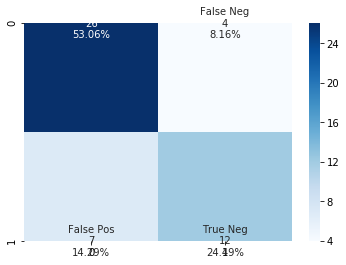

In [19]:
import seaborn as sns
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

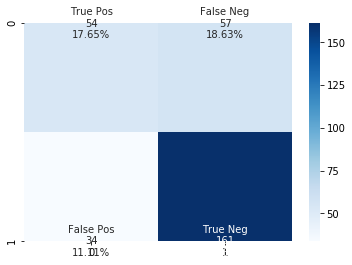

In [176]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
# for i in range(1,101):
#     model = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
#     model.fit(X_train, y_train.values.ravel())
#     hasil_prediksi = model.predict(X_test)
#     akurasi_knn = accuracy_score(y_test.values.ravel(), hasil_prediksi)*100
# #     print(akurasi_knn)
#     print('n_neighbor = {} Akurasi = {}'. format(i, akurasi_knn))